### Import pandas, numpy and matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import the dataset from this [address]('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv')

In [3]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
df = pd.read_csv(url, sep = '\t')

### Show the first 10 entries

In [4]:
df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### What is the number of observations in the dataset?

In [7]:
len(df.index)

4622

### What is the number of columns in the dataset?

In [6]:
len(df.columns)

5

### Which was the most-ordered item and how many times it was ordered?

In [8]:
t_stats = pd.pivot_table(df,aggfunc = sum,index = 'item_name', values = 'quantity')
print(t_stats.loc[t_stats['quantity'].idxmax()])

quantity    761
Name: Chicken Bowl, dtype: int64


### How many different items are sold?

In [9]:
len(t_stats.index)

50

### How many items were orderd in total?

In [11]:
df['quantity'].sum()

4972

### Turn the item price into a float

In [24]:
df.item_price = df.item_price.astype(float)
df['item_price'].dtypes

dtype('float64')

### What is the price of each item?

In [25]:
print(df.groupby(['item_name'])['item_price'].mean())

item_name
6 Pack Soft Drink                         6.610185
Barbacoa Bowl                            10.187273
Barbacoa Burrito                          9.832418
Barbacoa Crispy Tacos                    10.928182
Barbacoa Salad Bowl                      10.640000
Barbacoa Soft Tacos                      10.018400
Bottled Water                             1.867654
Bowl                                     14.800000
Burrito                                   7.400000
Canned Soda                               1.320577
Canned Soft Drink                         1.457641
Carnitas Bowl                            10.833971
Carnitas Burrito                         10.132712
Carnitas Crispy Tacos                    11.137143
Carnitas Salad                            8.990000
Carnitas Salad Bowl                      11.056667
Carnitas Soft Tacos                       9.398500
Chicken Bowl                             10.113953
Chicken Burrito                          10.082857
Chicken Crispy Tacos 

### How much was the revenue for the period in the dataset?

In [27]:
rev=df['item_price'].sum()
print(rev)

34500.16


### How many orders were made in the period?

In [30]:
len(df['order_id'].drop_duplicates())

1834

### What is the average revenue amount per order?

In [36]:
t_sum = pd.pivot_table(df, aggfunc = sum, index = 'order_id', values = 'item_price')
t_sum['item_price'].mean()

18.81142857142869

### Merge the table ```dfa``` that contains order date and order id with ```df``` and plot daily revenue 

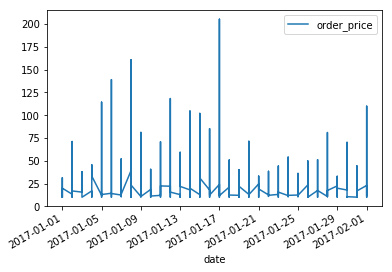

In [50]:
dfa = pd.DataFrame({"date": np.random.choice(pd.date_range(start="20170101", end="20170201"), size=1800),
                   "order_id": np.arange(1800)})
dfa['order_price']=t_sum['item_price']
dfa.plot(x='date',y='order_price')

### Create a histogram of the top 5 items bought

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D60B690F60>]],
      dtype=object)

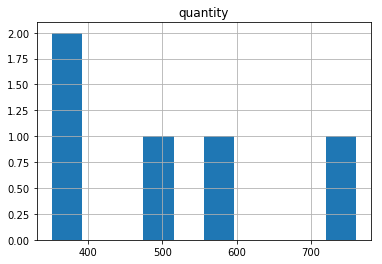

In [56]:
t_stats.sort_values(by='quantity').tail(5).hist()

### Sort the dataset by the name of the item

In [44]:
df['item_name'].drop_duplicates().sort_values()

298                         6 Pack Soft Drink
39                              Barbacoa Bowl
21                           Barbacoa Burrito
168                     Barbacoa Crispy Tacos
1229                      Barbacoa Salad Bowl
56                        Barbacoa Soft Tacos
34                              Bottled Water
445                                      Bowl
510                                   Burrito
18                                Canned Soda
263                         Canned Soft Drink
33                              Carnitas Bowl
27                           Carnitas Burrito
554                     Carnitas Crispy Tacos
3750                           Carnitas Salad
1132                      Carnitas Salad Bowl
237                       Carnitas Soft Tacos
4                                Chicken Bowl
16                            Chicken Burrito
11                       Chicken Crispy Tacos
250                             Chicken Salad
44                         Chicken

### How many times were a Veggie Salad Bowl ordered?

In [47]:
t_stats.loc['Veggie Salad Bowl']

quantity    18
Name: Veggie Salad Bowl, dtype: int64

### How many times people orderd more than one Canned Soda? 

In [60]:
t_order = pd.pivot_table(df, aggfunc = sum, index = 'order_id', columns = 'item_name', values = 'quantity')
(t_order['Canned Soda']>1).astype(bool).sum()

24

### Create a scatterplot with the number of items orderered per order price

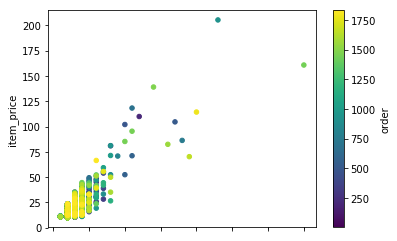

In [78]:
x = pd.pivot_table(df, aggfunc = sum, index = 'order_id',values = ['quantity','item_price'])
x['order']=range(1,1835)
ax=x.plot.scatter(x='quantity',y='item_price', c='order', colormap='viridis')